# 14th April,2023 Assignment ------------------------------ Shivam Tyagi

- Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. 
- The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
- Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("dataset.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.target.value_counts() # not much imbalanced data set.

1    165
0    138
Name: target, dtype: int64

### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [11]:
X = df.drop(['target'],axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [12]:
cat_features=['sex', 'cp', 'fbs', 'restecg', 'exang','slope', 'ca', 'thal', 'oldpeak']
num_features = ['age', 'trestbps', 'chol', 'thalach']

In [13]:
scale = StandardScaler()
X_train[num_features] = scale.fit_transform(X_train[num_features])
X_test[num_features] = scale.transform(X_test[num_features])


### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42,oob_score=True)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=42)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [15]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred), '\n')
print(classification_report(y_test,y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test,y_pred))

Accuracy: 0.7582417582417582 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        45
           1       0.77      0.74      0.76        46

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

Confusion matrix: 
 [[35 10]
 [12 34]]


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.


In [16]:
clf.feature_importances_

array([0.07966051, 0.03795303, 0.08597656, 0.08344006, 0.0825892 ,
       0.01001657, 0.01718843, 0.132326  , 0.04448099, 0.12757533,
       0.03621404, 0.09765196, 0.16492731])

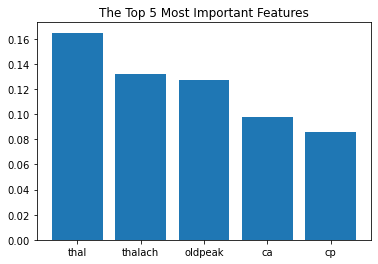

In [17]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

top_features = features[indices][:5]
top_importances = importances[indices][:5]

plt.bar(range(5), top_importances, tick_label=top_features)
plt.title('The Top 5 Most Important Features')
plt.show()

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [18]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(clf, param_grid = param_grid, cv = 3, scoring = "accuracy")
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, oob_score=True,
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [19]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [20]:
y_pred_grid = grid.predict(X_test)

In [21]:
print("Tuned Accuracy:", accuracy_score(y_test,y_pred_grid), '\n')
print("Accuracy Differece:", accuracy_score(y_test,y_pred_grid)-accuracy_score(y_test,y_pred))

Tuned Accuracy: 0.7582417582417582 

Accuracy Differece: 0.0


### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [22]:
feature1, feature2 = importances.argsort()[-2:]
print(feature1, feature2)

7 12


In [23]:
rfc = RandomForestClassifier()

In [24]:
rfc.fit(X_train.loc[:,['thal', 'thalach']], y_train)

RandomForestClassifier()

In [25]:
x_min, x_max = X.thal.min() , X.thal.max()
y_min, y_max = X.thalach.min(), X.thalach.max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

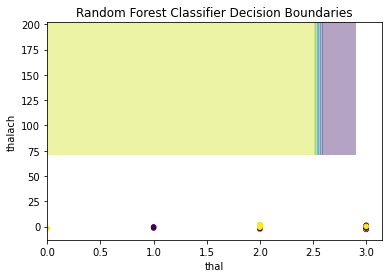

In [26]:
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test['thal'], X_test['thalach'], c=y_test, s=20)
plt.xlabel('thal')
plt.ylabel('thalach')
plt.title("Random Forest Classifier Decision Boundaries")
plt.show()


In [ ]:
Observation

Its hard to interpret the above decision boundry plot because the model trained for this plot was only trained on two features (the best features), and the model is having a hard time finding a concrete boundry between the two classed based on only two features. Because two features are not enough to separate one class from another properly.

